In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target



1.데이터를 정규화, 표준화 하지 않은 경우

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,
    test_size=0.2, random_state=2022
)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #fully connected network

In [6]:
model = Sequential([
    Dense(100,input_shape=(30,),activation='relu'), 
    #3100개인 이유= 30x100 + bias 100개
    Dense(24,activation='relu'),
    #2424개인 이유= 24x100 + bias 24개
    Dense(1,activation='sigmoid') 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

- 모델 학습

In [8]:
history=model.fit(X_train,y_train,validation_split=0.2,
          epochs=100,
          batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 63ms/step - loss: 20.9934 - accuracy: 0.4148 - val_loss: 11.4692 - val_accuracy: 0.6484
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 7.5635 - accuracy: 0.5989 - val_loss: 6.6312 - val_accuracy: 0.3516
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 6.0385 - accuracy: 0.3901 - val_loss: 0.4790 - val_accuracy: 0.8571
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4153 - accuracy: 0.7995 - val_loss: 1.7905 - val_accuracy: 0.7473
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9815 - accuracy: 0.8544 - val_loss: 0.9839 - val_accuracy: 0.7582
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1467 - accuracy: 0.7308 - val_loss: 0.3795 - val_accuracy: 0.9341
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.8819 - val_loss: 0.8181 - val_accuracy: 0.8791
Epoch 8/100
4/4 [==

- 모델 평가

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.8509


[0.5441654920578003, 0.8508771657943726]

- 훈련과정 시각화:epoch에 따른 accuracy, val_loss의 변화

In [9]:
import numpy as np 
y_acc = history.history['accuracy']
y_vloss=history.history['val_loss']
xs=np.arange(1,len(y_acc)+1)



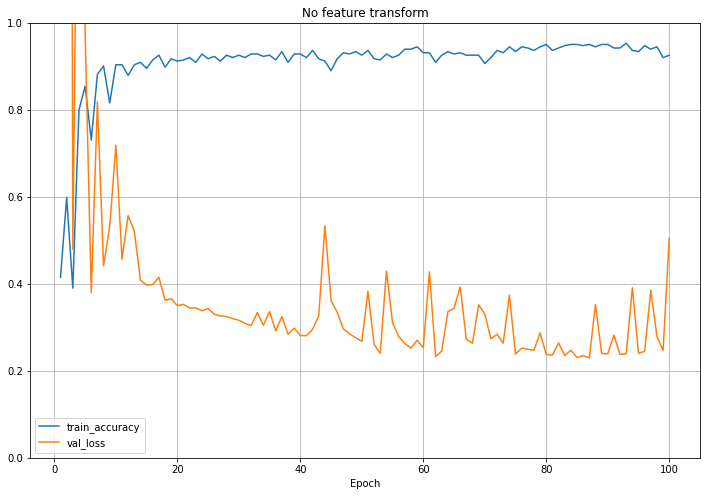

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train_accuracy')
plt.plot(xs,y_vloss,label='val_loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('No feature transform')

plt.ylim([0,1])
plt.show()

2.데이터를 정규화, 표준화한 경우

In [16]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [17]:
X_train2,X_test2,y_train2,y_test2=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,
    test_size=0.2, random_state=2022
)

In [18]:
model2=Sequential()
model2.add(Dense(100,input_dim=30,activation='relu'))
model2.add(Dense(24,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

#앞에 모델1에서 한 거랑 똑같음.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [19]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

- 모델 학습

In [20]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs=100, batch_size=100)


Epoch 1/100
4/4 [==============================] - 2s 134ms/step - loss: 9.9442 - accuracy: 0.5192 - val_loss: 8.4095 - val_accuracy: 0.6484
Epoch 2/100
4/4 [==============================] - 0s 31ms/step - loss: 4.4740 - accuracy: 0.6154 - val_loss: 4.6415 - val_accuracy: 0.3626
Epoch 3/100
4/4 [==============================] - 0s 35ms/step - loss: 2.8912 - accuracy: 0.5357 - val_loss: 1.0056 - val_accuracy: 0.7473
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 1.4176 - accuracy: 0.7582 - val_loss: 0.3221 - val_accuracy: 0.9011
Epoch 5/100
4/4 [==============================] - 0s 36ms/step - loss: 0.9188 - accuracy: 0.7637 - val_loss: 0.7839 - val_accuracy: 0.7692
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5932 - accuracy: 0.8599 - val_loss: 0.7950 - val_accuracy: 0.8681
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.7317 - accuracy: 0.8709 - val_loss: 0.3585 - val_accuracy: 0.9121
Epoch 8/100
4/4 [==

- 모델 평가

In [21]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.9035


[0.2850845456123352, 0.9035087823867798]

In [22]:
y_acc2 = hist2.history['accuracy']
y_vloss2=hist2.history['val_loss']
xs=np.arange(1,len(y_acc)+1)


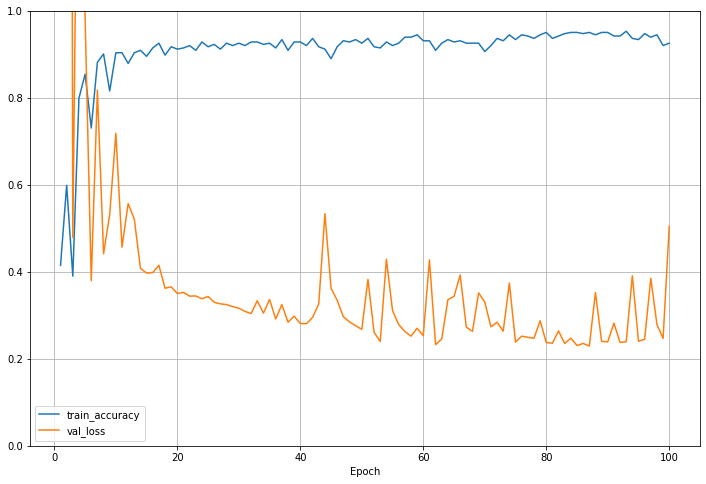

In [23]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc,label='train_accuracy')
plt.plot(xs,y_vloss,label='val_loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylim([0,1])
plt.show()